In [29]:
# Import statements
import numpy as np
import pandas as pd
import sqlite3

In [30]:
# Connecting to sqlite 
conn = sqlite3.connect('pudl_subset.sqlite')

# Creating a cursor object using the cursor() method 
cursor = conn.cursor()

In [31]:
# Show all tables in database
tables_query = """SELECT name FROM sqlite_master  
                  WHERE type='table';"""
cursor.execute(tables_query)
table_list = cursor.fetchall()
print(table_list)

[('yearly_plant_generation',), ('monthly_generation_grouped',)]


### Database columns explained
Descriptions from: https://data.catalyst.coop/pudl/out_ferc1__yearly_all_plants

- report_year: "Four-digit year in which the data was reported."
- utility_id_ferc1: "PUDL-assigned utility ID, identifying a FERC1 utility. This is an auto- incremented ID and is not expected to be stable from year to year."
- utility_id_pudl: "A manually assigned PUDL utility ID. May not be stable over time."
- utility_name_ferc1: "Name of the responding utility, as it is reported in FERC Form 1. For human readability only."
- plant_id_pudl: "A manually assigned PUDL plant ID. May not be constant over time."
- plant_id_ferc1: "Algorithmically assigned PUDL FERC Plant ID. WARNING: NOT STABLE BETWEEN PUDL DB INITIALIZATIONS."
- plant_name_ferc1: "Name of the plant, as reported to FERC. This is a freeform string, not guaranteed to be consistent across references to the same plant."
- net_generation_mwh: "Net electricity generation for the specified period in megawatt-hours (MWh)."
- fuel_cost_per_mwh: "Derived from MCOE, a unit level value. Average fuel cost per MWh of heat content in nominal USD."
- plant_type: "Type of plant."
- fuel_type: "Type of fuel."
- net_load_mwh: "Net output for load (net generation - energy used for pumping) in megawatt- hours."

### Import database into Pandas dataframe
There is currently only one table in the database. This is how you import it into Pandas.

In [32]:
pudl_yearly_df = pd.read_sql_query("SELECT * FROM yearly_plant_generation", conn)

In [33]:
# Filter the dataframe for entries with zip codes that start with 20, 21, 22, or 23
filtered_zip_df = pudl_yearly_df[pudl_yearly_df['zip_code'].astype(str).str.startswith(('20', '21', '22', '23'))]

# Display the filtered dataframe
filtered_zip_df

,report_year,utility_id_ferc1,utility_id_pudl_x,utility_name_ferc1,plant_id_pudl,plant_id_ferc1,plant_name_ferc1,net_generation_mwh,fuel_cost_per_mwh,plant_type,...,city,county,latitude,longitude,state,street_address,zip_code,utility_id_eia,utility_name_eia,utility_id_pudl_y
1534,2011,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,37,442.0,bear garden,2.235231e+06,33.707893,combined_cycle,...,New Canton,Buckingham,37.695557,-76.710320,VA,2608 C. G. Woodson Road,23123,19876.0,Virginia Electric & Power Co,349.0
1535,2012,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,37,442.0,bear garden,4.053230e+06,26.014851,combined_cycle,...,New Canton,Buckingham,37.695557,-76.710320,VA,2608 C. G. Woodson Road,23123,19876.0,Virginia Electric & Power Co,349.0
1536,2013,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,37,442.0,bear garden,3.732706e+06,33.751797,combined_cycle,...,New Canton,Buckingham,37.695557,-76.710320,VA,2608 C. G. Woodson Road,23123,19876.0,Virginia Electric & Power Co,349.0
1537,2014,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,37,442.0,bear garden,3.170118e+06,50.353065,combined_cycle,...,New Canton,Buckingham,37.695557,-76.710320,VA,2608 C. G. Woodson Road,23123,19876.0,Virginia Electric & Power Co,349.0
1538,2015,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,37,442.0,bear garden,3.461422e+06,32.774944,combined_cycle,...,New Canton,Buckingham,37.695557,-76.710320,VA,2608 C. G. Woodson Road,23123,19876.0,Virginia Electric & Power Co,349.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78688,2022,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,16102,156.0,fort powhatan,3.135089e+05,NaN,photovoltaic,...,Disputanta,Prince George,37.259998,-77.080002,VA,17505 Wards Creek Rd,23842,58468.0,Dominion Renewable Energy,1498.0
78689,2022,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,16102,156.0,fort powhatan,3.135089e+05,NaN,photovoltaic,...,Disputanta,Prince George,37.259998,-77.080002,VA,17505 Wards Creek Rd,23842,64711.0,fort powhatan solar,13981.0
78690,2023,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,16102,156.0,fort powhatan,3.128501e+05,NaN,photovoltaic,...,Disputanta,Prince George,37.259998,-77.080002,VA,17505 Wards Creek Rd,23842,58468.0,Dominion Renewable Energy,1498.0
78691,2023,164,349,VIRGINIA ELECTRIC AND POWER COMPANY,16102,156.0,fort powhatan,3.128501e+05,NaN,photovoltaic,...,Disputanta,Prince George,37.259998,-77.080002,VA,17505 Wards Creek Rd,23842,64711.0,fort powhatan solar,13981.0


### Import monthly data into Pandas from database
This is likely the data we will use the most

In [34]:
# Function to get the schema of a table
def get_table_schema(table_name):
    schema_query = f"PRAGMA table_info({table_name});"
    cursor.execute(schema_query)
    schema = cursor.fetchall()
    return schema

# Get schema for each table
for table in table_list:
    table_name = table[0]
    schema = get_table_schema(table_name)
    print(f"Schema for table {table_name}:")
    for column in schema:
        print(f"  {column[1]} ({column[2]})")
    print("\n")

Schema for table yearly_plant_generation:
  report_year (BIGINT)
  utility_id_ferc1 (BIGINT)
  utility_id_pudl_x (BIGINT)
  utility_name_ferc1 (TEXT)
  plant_id_pudl (BIGINT)
  plant_id_ferc1 (FLOAT)
  plant_name_ferc1 (TEXT)
  net_generation_mwh (FLOAT)
  fuel_cost_per_mwh (FLOAT)
  plant_type (TEXT)
  fuel_type (TEXT)
  net_load_mwh (FLOAT)
  plant_id_eia (FLOAT)
  plant_name_eia (TEXT)
  city (TEXT)
  county (TEXT)
  latitude (FLOAT)
  longitude (FLOAT)
  state (TEXT)
  street_address (TEXT)
  zip_code (TEXT)
  utility_id_eia (FLOAT)
  utility_name_eia (TEXT)
  utility_id_pudl_y (FLOAT)


Schema for table monthly_generation_grouped:
  report_date (TEXT)
  state (TEXT)
  SUM(net_generation_mwh) (FLOAT)




In [35]:
import os
import pandas as pd

# Define the folder path
folder_path = 'data_center_locations'

# Initialize an empty list to store dataframes
dataframes = []

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        dataframes.append(df)

# Concatenate all dataframes into a single dataframe
all_locations_df = pd.concat(dataframes, ignore_index=True)

# Display the combined dataframe
all_locations_df.head()

,Continent,Location,Country,Latitude,Longitude,Year Established
0,Asia,Hangzhou,China,30.2741,120.1551,-
1,Asia,Beijing,China,39.9042,116.4074,-
2,Asia,Shanghai,China,31.2304,121.4737,-
3,Asia,Shenzhen,China,22.5431,114.0579,-
4,Asia,Hong Kong,Hong Kong,22.3193,114.1694,-


In [36]:
# Filter the DataFrame to include only North American values
north_america_df = all_locations_df[all_locations_df['Continent'] == 'North America']

# Display the filtered DataFrame
north_america_df

,Continent,Location,Country,Latitude,Longitude,Year Established
10,North America,"Ashburn, Virginia",United States,39.0215,-77.4579,-
11,North America,Northern Virginia (Multiple locations),United States,-,-,-
12,North America,"Boardman, Oregon",United States,45.8696,-119.688,-
13,North America,"Dublin, Ohio",United States,40.1386,-83.0901,-
14,North America,"Montreal, Quebec",Canada,45.504,-73.5747,-
24,North America,"Maiden, North Carolina",United States,35.6543,-81.218,2010
25,North America,"Newark, California",United States,37.529,-122.0446,-
28,North America,"Ashburn, Virginia",United States,39.0215,-77.4579,-
29,North America,"Chicago, Illinois",United States,41.8781,-87.6298,-
30,North America,"Dallas, Texas",United States,32.7767,-96.797,-


In [37]:
import requests

response = requests.get("http://api.zippopotam.us/us/90210")
data = response.json()
print(data)

{'post code': '90210', 'country': 'United States', 'country abbreviation': 'US', 'places': [{'place name': 'Beverly Hills', 'longitude': '-118.4065', 'state': 'California', 'state abbreviation': 'CA', 'latitude': '34.0901'}]}


In [38]:
response = requests.get("http://api.zippopotam.us/us/az/phoenix")
data = response.json()
print(data)
# Extract all zip codes associated with Phoenix
phoenix_zip_codes = [place['post code'] for place in data['places']]
print(phoenix_zip_codes)

{'country abbreviation': 'US', 'places': [{'place name': 'Phoenix', 'longitude': '-112.3518', 'post code': '85001', 'latitude': '33.704'}, {'place name': 'Phoenix', 'longitude': '-112.1872', 'post code': '85002', 'latitude': '33.2765'}, {'place name': 'Phoenix', 'longitude': '-112.0774', 'post code': '85003', 'latitude': '33.4511'}, {'place name': 'Phoenix', 'longitude': '-112.0686', 'post code': '85004', 'latitude': '33.4557'}, {'place name': 'Phoenix', 'longitude': '-112.1872', 'post code': '85005', 'latitude': '33.2765'}, {'place name': 'Phoenix', 'longitude': '-112.0474', 'post code': '85006', 'latitude': '33.465'}, {'place name': 'Phoenix', 'longitude': '-112.0893', 'post code': '85007', 'latitude': '33.4523'}, {'place name': 'Phoenix', 'longitude': '-111.9984', 'post code': '85008', 'latitude': '33.4665'}, {'place name': 'Phoenix', 'longitude': '-112.1284', 'post code': '85009', 'latitude': '33.4564'}, {'place name': 'Phoenix', 'longitude': '-112.1872', 'post code': '85010', 'lat

In [39]:
# Filter out entries not in the United States
north_america_df = north_america_df[north_america_df['Country'] == 'United States']

# Update the Location column to be in the format "State/Town"
def format_location(row):
	if ',' in row['Location']:
		parts = row['Location'].split(', ')
		return f"{parts[1]}/{parts[0]}"
	return row['Location']

north_america_df['Location'] = north_america_df.apply(format_location, axis=1)

# Display the updated DataFrame
# north_america_df

C:\Users\noaha\AppData\Local\Temp\ipykernel_20888\3243955445.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_america_df['Location'] = north_america_df.apply(format_location, axis=1)


In [40]:
# Dictionary to map full state names to their abbreviations
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
    'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
    'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
    'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Function to replace full state names with abbreviations in the Location column
def replace_state_names(location):
    for state, abbreviation in state_abbreviations.items():
        if state in location:
            return location.replace(state, abbreviation)
    return location

# Apply the function to the Location column
north_america_df['Location'] = north_america_df['Location'].apply(replace_state_names)

# Display the updated DataFrame
# north_america_df

C:\Users\noaha\AppData\Local\Temp\ipykernel_20888\97394499.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_america_df['Location'] = north_america_df['Location'].apply(replace_state_names)


In [41]:
import requests

# Function to get zip codes for a given location
def get_zip_codes(location):
    try:
        response = requests.get(f"http://api.zippopotam.us/us/{location}")
        if response.status_code == 200:
            data = response.json()
            zip_codes = [place['post code'] for place in data['places']]
            return ', '.join(zip_codes)
        else:
            return None
    except Exception as e:
        print(f"Error fetching zip codes for {location}: {e}")
        return None

# Update the 'Zip Codes' column for each entry in the DataFrame
north_america_df['Zip Codes'] = north_america_df['Location'].apply(get_zip_codes)

# Display the updated DataFrame
north_america_df.tail()

C:\Users\noaha\AppData\Local\Temp\ipykernel_20888\2872888222.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_america_df['Zip Codes'] = north_america_df['Location'].apply(get_zip_codes)


,Continent,Location,Country,Latitude,Longitude,Year Established,Zip Codes
80,North America,TX/San Antonio,United States,29.4997,-98.3992,2008,"78201, 78202, 78203, 78204, 78205, 78206, 7820..."
81,North America,WY/Cheyenne,United States,41.14,-104.8202,2013,"82001, 82002, 82003, 82006, 82007, 82008, 8200..."
82,North America,IL/Chicago,United States,41.8819,-87.6278,2015,"60064, 60086, 60185, 60186, 60290, 60411, 6041..."
90,North America,VA/Ashburn,United States,39.0215,-77.4579,-,"20146, 20147, 20148, 20149, 22011, 22093"
91,North America,AZ/Phoenix,United States,33.4484,-112.074,-,"85001, 85002, 85003, 85004, 85005, 85006, 8500..."


In [42]:
# Extract all zip codes from the 'Zip Codes' column and create a list of unique zip codes
data_center_zipcodes = north_america_df['Zip Codes'].dropna().str.split(', ').explode().unique().tolist()

# Display the list of data center zip codes
print(data_center_zipcodes)

['20146', '20147', '20148', '20149', '22011', '22093', '97818', '43016', '43017', '28650', '94560', '60064', '60086', '60185', '60186', '60290', '60411', '60412', '60415', '60601', '60602', '60603', '60604', '60605', '60606', '60607', '60608', '60609', '60610', '60611', '60612', '60613', '60614', '60615', '60616', '60617', '60618', '60619', '60620', '60621', '60622', '60623', '60624', '60625', '60626', '60628', '60629', '60630', '60631', '60632', '60633', '60634', '60636', '60637', '60638', '60639', '60640', '60641', '60642', '60643', '60644', '60645', '60646', '60647', '60648', '60649', '60651', '60652', '60653', '60654', '60655', '60656', '60657', '60658', '60659', '60660', '60661', '60663', '60664', '60665', '60667', '60668', '60669', '60670', '60671', '60672', '60673', '60674', '60675', '60677', '60678', '60680', '60681', '60682', '60683', '60684', '60685', '60686', '60687', '60688', '60689', '60690', '60691', '60693', '60694', '60695', '60696', '60697', '60699', '60701', '60799', 

In [45]:
# Convert the list of data center zip codes to a tuple for use in SQL query
zip_codes_tuple = tuple(data_center_zipcodes)

# Create a SQL query to filter the entries
query = f"""
SELECT *
FROM yearly_plant_generation
WHERE zip_code IN {zip_codes_tuple}
"""

# Execute the query and store the result in a DataFrame
filtered_entries_df = pd.read_sql_query(query, conn)

# Sort the filtered DataFrame by 'report_year'
filtered_entries_df = filtered_entries_df.sort_values(by='report_year')

# Display the sorted DataFrame
filtered_entries_df.head()

# Filter the DataFrame to include only entries after 2015
filtered_entries_after_2015_df = filtered_entries_df[filtered_entries_df['report_year'] > 2015]

# Display the filtered DataFrame
filtered_entries_after_2015_df.head()

,report_year,utility_id_ferc1,utility_id_pudl_x,utility_name_ferc1,plant_id_pudl,plant_id_ferc1,plant_name_ferc1,net_generation_mwh,fuel_cost_per_mwh,plant_type,...,city,county,latitude,longitude,state,street_address,zip_code,utility_id_eia,utility_name_eia,utility_id_pudl_y
315,2016,286,31,Arizona Public Service Company,437,153.0,palo verde 2,3403812.500,8.420292,nuclear,...,Wintersburg,Maricopa,33.388100,-112.861702,AZ,Wintersburg Road,85036,803.0,Arizona Public Service Co,31.0
293,2016,263,274,Public Service Company of New Mexico,437,2809.0,palo verde (1),3291008.000,7.395033,nuclear,...,Wintersburg,Maricopa,33.388100,-112.861702,AZ,Wintersburg Road,85036,803.0,Arizona Public Service Co,31.0
97,2016,289,62,"Cheyenne Light, Fuel and Power Company",112,708.0,cheyenne prairie 42%,67705.000,23.891603,combined_cycle,...,Cheyenne,Laramie,41.123611,-104.720001,WY,6711 HR Ranch Road,82007,56771.0,Black Hills Service Company LLC,636.0
367,2016,286,31,Arizona Public Service Company,437,NaN,palo verde emergengy ops center,0.067,NaN,photovoltaic,...,Wintersburg,Maricopa,33.388100,-112.861702,AZ,Wintersburg Road,85036,803.0,Arizona Public Service Co,31.0
663,2016,263,274,Public Service Company of New Mexico,764,NaN,manzano solar,NaN,NaN,None,...,Los Lunas,Valencia,34.746666,-106.654404,NM,100 Bonita Vista,87031,59300.0,PNM Resources,2869.0


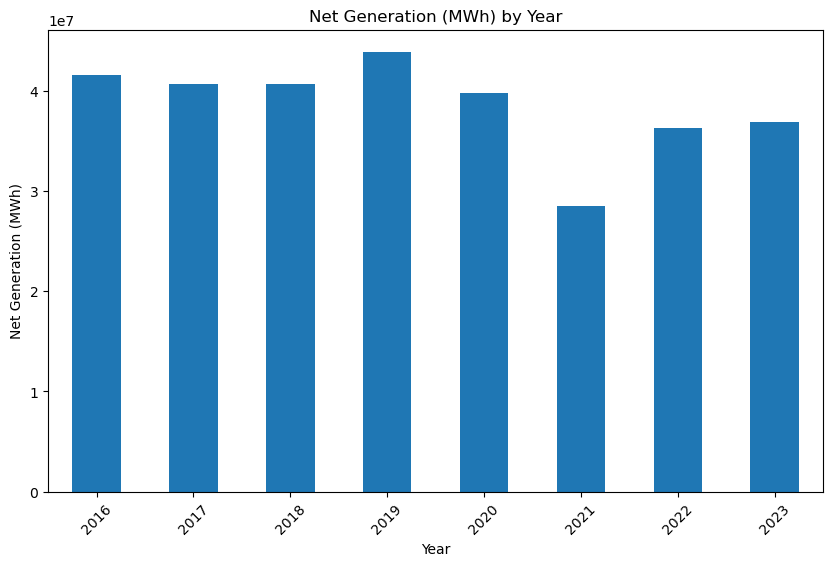

In [46]:
import matplotlib.pyplot as plt

# Group the data by report_year and sum the net_generation_mwh
generation_by_year = filtered_entries_after_2015_df.groupby('report_year')['net_generation_mwh'].sum()

# Plot the data
plt.figure(figsize=(10, 6))
generation_by_year.plot(kind='bar')
plt.title('Net Generation (MWh) by Year')
plt.xlabel('Year')
plt.ylabel('Net Generation (MWh)')
plt.xticks(rotation=45)
plt.show()